In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly_remap.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 496, lon: 32, lat: 40)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Aug 11 11:16:04 2022: cdo remapnn,grid.des chirps-...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 299, lon: 32, lat: 40)
Coordinates:
  * time     (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2005-12-01
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Aug 11 11:16:04 2022: cdo remapnn,grid.des chirps-...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 100, lon: 32, lat: 40)
Coordinates:
  * time     (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Aug 11 11:16:04 2022: cdo remapnn,grid.des chirps-...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [248.97762, 275.25247, 338.84406, ..., 204.03615, 273.31155,
        398.09113],
       [313.03275, 304.99213, 340.83173, ..., 159.18379, 245.99791,
        286.82858],
       [300.33856, 273.78464, 231.78273, ..., 220.41202, 251.78061,
        284.67566]], dtype=float32)
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [8]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167



chirps = pr_mm

In [9]:
#opening the gcm mpi data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MPI-ESM-MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [10]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 299, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-02-01 ... 2005-12-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [11]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-10-01
    lat_bnds   (lat, bnds) float64 -90.0 -87.65 -87.65 ... 87.65 87.65 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [12]:
#jjas_data.x.values
#jjas_data.y.values


In [13]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
#jjas_data

In [14]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lat: 40, lon: 32)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * lon        (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-10-01
    lat_bnds   (lat, bnds) float64 17.19 19.06 17.44 19.31 ... 28.56 26.94 28.81
    lon_bnds   (lon, bnds) float64 85.19 87.06 85.44 87.31 ... 94.56 92.94 94.81
    pr         (time, lat, lon) float64 9.057e-05 9.775e-05 ... 0.0001983
Attributes: (12/27)
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-MR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-MR
    forcing:                GHG,Oz,SD,Sl,Vl,LU
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-MR model output prepared for CMIP5 histor...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [15]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[9.43171018e-05, 9.44276347e-05, 9.76195821e-05, ...,
        1.36110168e-04, 1.32716136e-04, 1.30602622e-04],
       [8.84158500e-05, 8.86569329e-05, 9.18253676e-05, ...,
        1.32055379e-04, 1.27914806e-04, 1.25141680e-04],
       [8.25145983e-05, 8.28862311e-05, 8.60311530e-05, ...,
        1.28000591e-04, 1.23113477e-04, 1.19680739e-04],
       ...,
       [2.04007839e-04, 2.12223079e-04, 2.18565668e-04, ...,
        1.98003023e-04, 1.90135175e-04, 1.82543205e-04],
       [1.95780805e-04, 2.02316423e-04, 2.07127822e-04, ...,
        1.97049793e-04, 1.91844963e-04, 1.86177134e-04],
       [1.87553772e-04, 1.92409766e-04, 1.95689976e-04, ...,
        1.96096564e-04, 1.93554752e-04, 1.89811064e-04]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [16]:
mpi = jjas_mean*86400
mpi

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 8.14899759,  8.15854764,  8.43433189, ..., 11.7599185 ,
        11.46667416, 11.28406657],
       [ 7.63912944,  7.659959  ,  7.93371176, ..., 11.40958476,
        11.05183928, 10.81224119],
       [ 7.12926129,  7.16137037,  7.43309162, ..., 11.05925103,
        10.6370044 , 10.34041582],
       ...,
       [17.62627733, 18.33607405, 18.88407372, ..., 17.10746122,
        16.42767909, 15.77173288],
       [16.91546159, 17.48013892, 17.89584382, ..., 17.02510216,
        16.57540484, 16.08570441],
       [16.20464586, 16.62420379, 16.90761392, ..., 16.9427431 ,
        16.7231306 , 16.39967593]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [17]:
bias = mpi - chirps
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 9.44072092,  9.28668803,  7.74400757, ..., 10.39943099,
         7.44210341,  2.68382032],
       [ 6.62398534,  7.45301165,  6.69043   , ..., 11.79166843,
         8.48781177,  6.65573367],
       [ 6.33051275,  7.62307464,  9.28736798, ...,  9.69632843,
         8.44542064,  7.0404869 ]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [18]:
bias_percentage = ((mpi - chirps)/chirps)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [115.33389353, 102.62229949,  69.51491555, ..., 155.02957869,
         82.82277821,  20.50609913],
       [ 64.36380149,  74.32848369,  59.70712112, ..., 225.31418294,
        104.94855124,  70.58063963],
       [ 64.11208639,  84.69020397, 121.87753602, ..., 133.80863348,
        102.02605164,  75.22539478]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

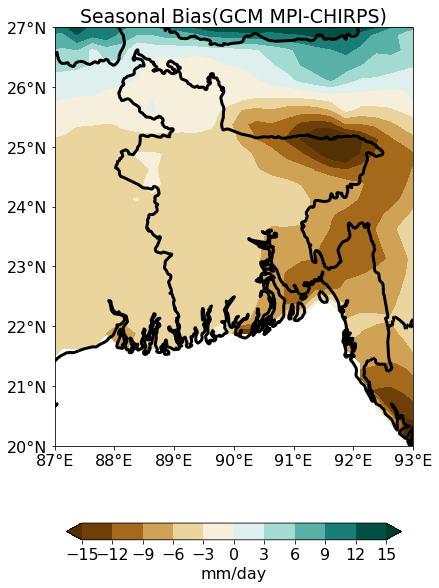

In [24]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
               levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)




plt.title('Seasonal Bias(GCM MPI-CHIRPS)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(gcm mpi-chirps).png")



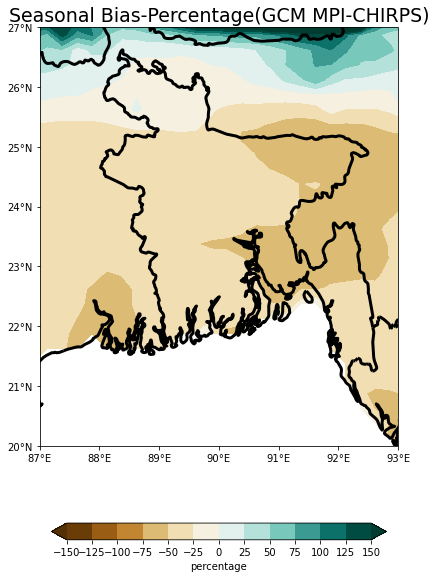

In [20]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(GCM MPI-CHIRPS)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(gcm mpi-chirps).png")







In [21]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r